In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["font.size"] = 15
plt.rcParams["figure.figsize"] = (16,9)
plt.rcParams["axes.unicode_minus"] = False
plt.style.use("ggplot")

pd.set_option("display.max_rows", 10)
pd.set_option("display.max_columns", 10)

# 0.Data Load
---

In [2]:
df_aff = pd.read_csv("../LPOINT_BIG_COMP/LPOINT_BIG_COMP_03_COP_U.csv")
df_aff.head()

,cust,rct_no,cop_c,br_c,chnl_dv,de_dt,vst_dt,de_hr,buy_am
0,M839993508,21102612B015763935,B01,B010012,1,20211026,20211026,12,60000
1,M839993508,21110610B014219744,B01,B010012,1,20211106,20211106,10,17100
2,M839993508,21021112B013419710,B01,B010012,1,20210211,20210211,12,136500
3,M839993508,21092010B012637545,B01,B010012,1,20210920,20210920,10,34200
4,M839993508,21101009D015920171,D01,D010614,1,20211010,20211010,9,2500


In [3]:
df_aff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248304 entries, 0 to 248303
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   cust     248304 non-null  object
 1   rct_no   248304 non-null  object
 2   cop_c    248304 non-null  object
 3   br_c     248249 non-null  object
 4   chnl_dv  248304 non-null  int64 
 5   de_dt    248304 non-null  int64 
 6   vst_dt   248304 non-null  int64 
 7   de_hr    248304 non-null  int64 
 8   buy_am   248304 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 17.0+ MB


In [4]:
# Number of Unique Values
for col in df_aff.columns:
    unq_arr = df_aff[col].unique()
    print(f"{col}: {df_aff[col].nunique()}\t{['*']+unq_arr[:10].tolist() if df_aff[col].nunique()>20 else unq_arr}")
    print()
print(f"Total DF Length: {len(df_aff)}")

cust: 21769	['*', 'M839993508', 'M348796971', 'M859929802', 'M402567093', 'M355649173', 'M455885515', 'M134245308', 'M267409798', 'M872147557', 'M725568174']

rct_no: 248304	['*', '21102612B015763935', '21110610B014219744', '21021112B013419710', '21092010B012637545', '21101009D015920171', '21052913C012653941', '21103114D013043421', '21060414C012756148', '21060513C011958388', '21060815C015053738']

cop_c: 6	['B01' 'D01' 'C01' 'D02' 'C02' 'E01']

br_c: 2029	['*', 'B010012', 'D010614', 'C010003', 'D010398', 'D010322', 'D010577', 'D020485', 'D010968', 'C010011', 'D010388']

chnl_dv: 2	[1 2]

de_dt: 369	['*', 20211026, 20211106, 20210211, 20210920, 20211010, 20210529, 20211031, 20210604, 20210605, 20210608]

vst_dt: 366	['*', 20211026, 20211106, 20210211, 20210920, 20211010, 20210529, 20211031, 20210604, 20210605, 20210608]

de_hr: 24	['*', 12, 10, 9, 13, 14, 15, 16, 11, 21, 20]

buy_am: 9420	['*', 60000, 17100, 136500, 34200, 2500, 5000, 4600, 7000, 7800, 5900]

Total DF Length: 248304


- `B01`: 숙박업종
- `C01~2`: 엔터테인먼트
- `D01~2`: F&B
- `E01`: 렌탈업종
- **A(유통사)** 에 해당하는 정보는 Affiliate에 존재하지 않음

In [5]:
df_aff.loc[df_aff["cop_c"].str.contains("C")]

,cust,rct_no,cop_c,br_c,chnl_dv,de_dt,vst_dt,de_hr,buy_am
5,M348796971,21052913C012653941,C01,C010003,1,20210529,20210529,13,5000
7,M348796971,21060414C012756148,C01,C010003,1,20210604,20210604,14,5000
8,M348796971,21060513C011958388,C01,C010003,1,20210605,20210605,13,5000
9,M348796971,21060815C015053738,C01,C010003,1,20210608,20210608,15,5000
10,M348796971,21062013C014651494,C01,C010003,1,20210620,20210620,13,5000
...,...,...,...,...,...,...,...,...,...
248299,M058650684,21111614C021426818,C02,C020002,1,20211116,20211116,14,2000
248300,M058650684,21111619C023223432,C02,C020002,1,20211116,20211116,19,26900
248301,M014154595,21121209C015324520,C01,C010087,2,20211212,20211212,9,2000
248302,M510878172,21112719C013369102,C01,C010007,2,20211127,20211127,19,6000


# 1.On/Offline
---

In [6]:
df_off = df_aff.loc[df_aff["chnl_dv"]==1]
df_on = df_aff.loc[df_aff["chnl_dv"]==2]

# 1.1.Visualization about channel
---

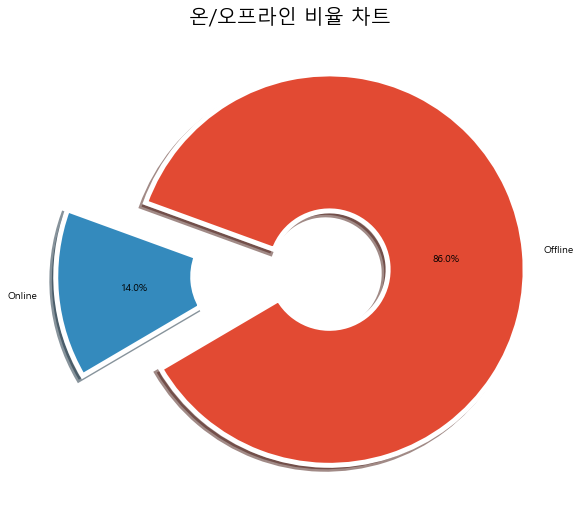

In [10]:
# pie chart
vcs = df_aff["chnl_dv"].value_counts()
explode = [0.2]*len(vcs)
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(vcs, labels=list(map(lambda x: "Online" if x==2 else "Offline",vcs.index)), 
        autopct='%.1f%%', startangle=160, counterclock=False, explode=explode, shadow=True, wedgeprops=wedgeprops)
plt.title("온/오프라인 비율 차트", size=20)
plt.show()

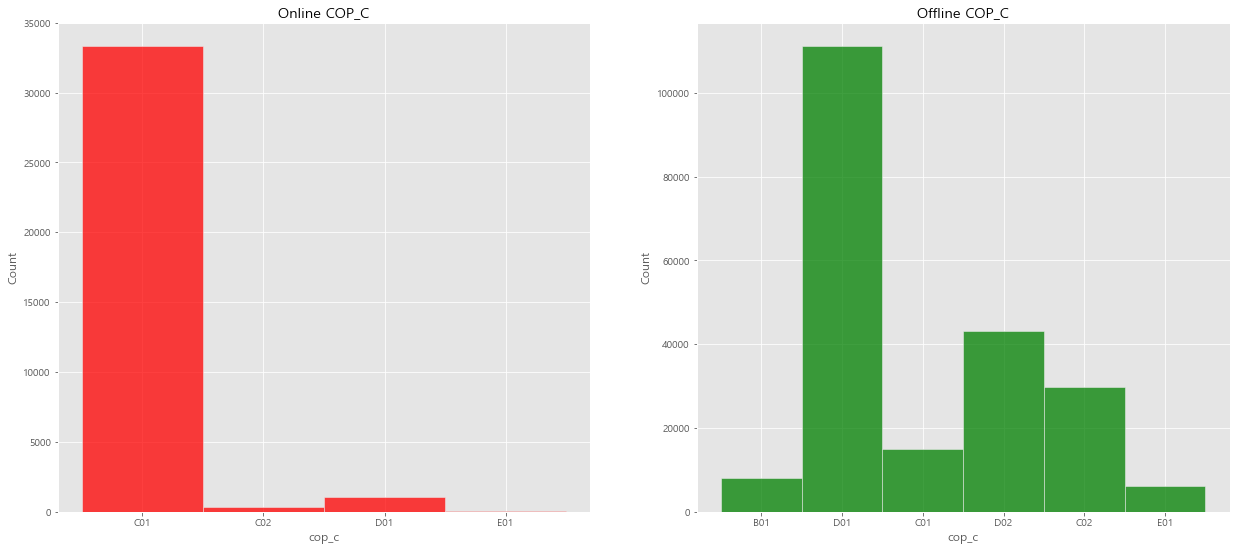

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(21,9))
sns.histplot(data=df_on["cop_c"], ax=ax[0], color="red")
sns.histplot(data=df_off["cop_c"], ax=ax[1], color="green")
ax[0].set_title("Online COP_C")
ax[1].set_title("Offline COP_C")
plt.show()